## Session 02, task C:

In this task you will implement a simple version of Histogram of Oriented Gradients algorithm. In order to validate if your method works as expected you will plot HoG descriptor from `scikit-image` library.

In [ ]:
#Implement histogram of gradients algorithm


#read image

#plot every step you take

#display hog from scikit learn and compare your results

 Next we have to find the HOG Descriptor of each cell. For that, we find Sobel derivatives of each cell in X and Y direction. Then find their magnitude and direction of gradient at each pixel. 
 
 This gradient is quantized to 16 integer values. Divide this image to four sub-squares. For each sub-square, calculate the histogram of direction (16 bins) weighted with their magnitude. So each sub-square gives you a vector containing 16 values. Four such vectors (of four sub-squares) together gives us a feature vector containing 64 values. This is the feature vector we use to train our data.


In [4]:
#imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
#from skimage import data, exposure
from skimage.io import imread #function to read images
from skimage.transform import resize
from skimage.util import img_as_ubyte

#Reading in a image
image_file = './assets/simple_blobs/ellipsy_1.png' #You can try loading other images.
image = imread(image_file,as_gray=True)
image = resize(image, (64,64), anti_aliasing=False) #Our descriptor will be designed to work on some sizes of images only


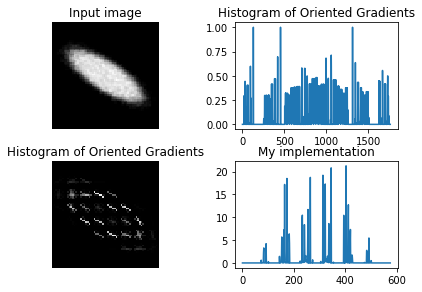

In [33]:
# Let's display our test image and HoG descriptor
# calculated using skimage
# Re-run this cell when you finish your implementation


#HoG parameters for both implementations
n_orientations=9
n_ppc=8 # side of image block into which we divide the image


f, axes = plt.subplots(2,2)  # Create four subplots (2x2 grid)
f.tight_layout()
(img, hog_hist, hog_img, my_hog_hist) = axes.flatten()

img.axis('off')
img.imshow(image, cmap=plt.cm.gray)
img.set_title('Input image')

fd, hog_image = hog(image, orientations=n_orientations, pixels_per_cell=(n_ppc, n_ppc),
                    cells_per_block=(2, 2), visualize=True, multichannel=False)

hog_img.axis('off')
hog_img.imshow(hog_image, cmap=plt.cm.gray)
hog_img.set_title('Histogram of Oriented Gradients')

hog_hist.plot(fd)
hog_hist.set_title('Histogram of Oriented Gradients')

myhog_image = myHog(image)
my_hog_hist.plot(myhog_image)
my_hog_hist.set_title('My implementation')


plt.show()

In [34]:
import cv2 
def myHog(img):
    gx = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    #plt.imshow(gx)
    #plt.show()
    #plt.imshow(gy)
    #plt.show()
    mag, ang = cv2.cartToPolar(gx, gy)
    
    bins = np.int32(n_orientations*ang/(2*np.pi))
    
    cells_per_img = int(img.shape[0]/ppi) #int is a floor in python
    
    bin_cells = []
    for iii in range(0,cells_per_img):
        for jjj in range(0,cells_per_img):
            bin_cells.append(bins[iii*n_ppc:(iii+1)*n_ppc,jjj*n_ppc:(jjj+1)*n_ppc])
                         
    mag_cells = []
    for iii in range(0,cells_per_img):
        for jjj in range(0,cells_per_img):
            mag_cells.append(mag[iii*n_ppc:(iii+1)*n_ppc,jjj*n_ppc:(jjj+1)*n_ppc])
                     
    hists = [np.bincount(b.ravel(), m.ravel(), n_orientations) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)     # hist is a 64 bit vector
    return hist

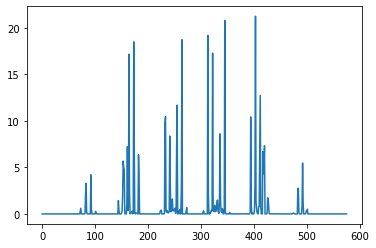

In [35]:
#run function to see how if it works
plt.plot(myHog(image))
plt.show()